# Netflix Analysis


### In this we are going to analyse Netflix data we have and we are going to answer few question arises in our mind, when we focus on the data


Netflix is one of the biggest platform for entertainment where multiple countries take part and releases their own unique story in form of movie and series. Due to the high demand of this platform we need to optimize this business so that it can benefit good creator and artist as well as provide very good level of entertainment stuff.

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### Loading dataset

In [2]:
Netflix_data = pd.read_csv('./netflix_titles.csv')
Netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Cleaning data from NaN values


In [3]:
# Filling NaN values with unknown
Netflix_data = Netflix_data.fillna('unknown')
Netflix_data['date_added'].value_counts()['unknown']
Netflix_data = Netflix_data[Netflix_data.date_added.isin(['unknown']) == False]
Netflix_data['date_added'].count()

# replacing unknown values with moded value in the column
for column in Netflix_data:
    for values in column:
        if column == 'unknown':
            Netflix_data[column].replace(['unknown'],Netflix_data[column].mode()[0],inplace = True)
        else:
            pass
        
# Replacing unknown values with moded values in a column
for column in Netflix_data:
    Netflix_data[column].replace(['unknown'],Netflix_data[column].mode()[0],inplace = True)
        
# Netflix_data.head()

### Convering date values in datetime format

In [4]:
#Months_collection = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
#Netflix_data['date'] = pd.to_datetime(Netflix_data['date_added'],format='%m%d%Y')


# Adding columns for date and month
months = []
for x in Netflix_data['date_added']:
#     x.strip()
#     print(x)
    p=datetime.strptime(x.strip(), '%B %d, %Y').strftime('%m')
    months.append(p)

    
# Adding colums for date
dates = []
for x in Netflix_data['date_added']:
#     x.strip()
#     print(x)
    p=datetime.strptime(x.strip(), '%B %d, %Y').strftime('%d-%m-%y')
    dates.append(p)
# here i faced multiple challanges converting string date into date time format



In [5]:
# Adding date and month column in our dataframe
Netflix_data['date_added'] = dates
Netflix_data['months'] = pd.Series(months)

### Which year has most releases tilldate?

In [6]:
# Netflix_data.head()

In [7]:
Netflix_data['count'] = 1
Year_data = Netflix_data.groupby('release_year').sum(numeric_only=True)
Year_data = Year_data.sort_values('release_year',ascending=False)
Year_data.reset_index(inplace=True)

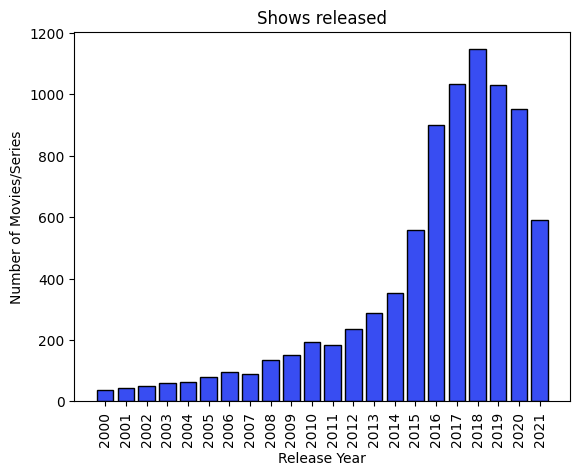

In [8]:
plt.bar(Year_data['release_year'][0:22],Year_data['count'][0:22],color='#384df2', edgecolor='black')
plt.xticks(Year_data['release_year'][0:22],rotation = 90)
plt.ylabel('Number of Movies/Series')
plt.xlabel('Release Year')
plt.title('Shows released')
plt.show()

In year 2018 Netflix released maximum shows till date

### Which type of show does netflix produce most?

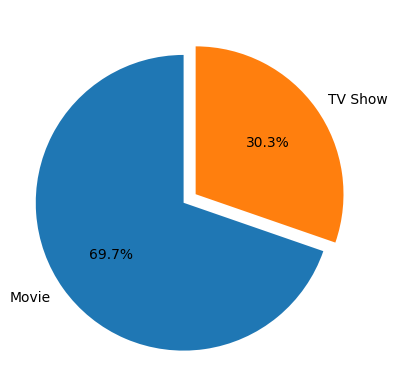

In [9]:
# finding which type netflix produces most
a  = Netflix_data.groupby(['type']).sum(numeric_only=True).drop(['release_year'],axis=1).reset_index()
plt.pie(a['count'],labels=a['type'],explode=[0.1, 0], startangle=90, autopct="%.1f%%")
plt.show()

We can now that netflix produces Movies more as compared to TV Shows

### In which month does netflix releases most shows/movies?


In [10]:
month = Netflix_data[['months','count']].groupby(['months']).sum().reset_index()

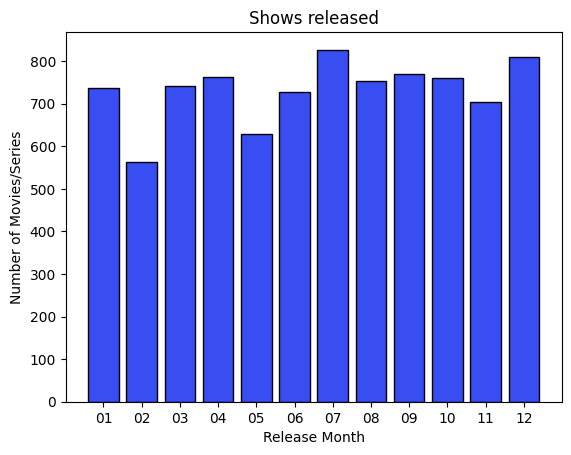

In [11]:
plt.bar(month['months'],month['count'],color='#384df2', edgecolor='black')
plt.ylabel('Number of Movies/Series')
plt.xlabel('Release Month')
plt.title('Shows released')
plt.show()

We can see that netflix releases most number of shows in around June and December but i think this can be a biased result because of the releases in recent years

### Which director released most number of shows for netflix?

In [12]:
director = Netflix_data[['director','count']].groupby(['director']).sum().reset_index()
director = director.sort_values('count',ascending=False)

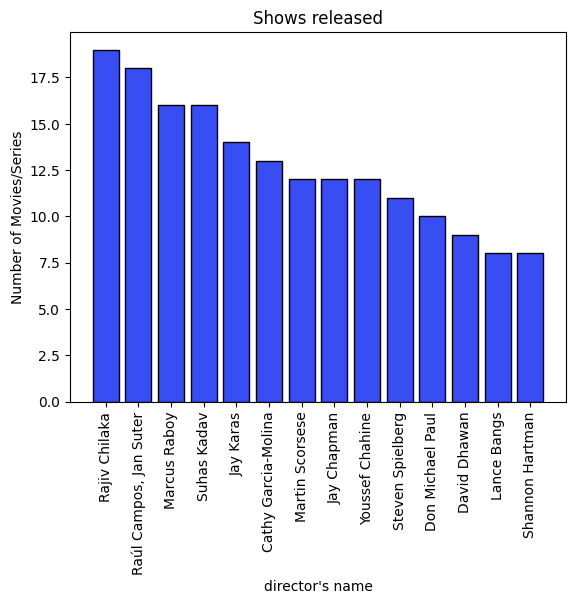

In [13]:
plt.bar(director['director'][1:15],director['count'][1:15],color='#384df2', edgecolor='black')
plt.xticks(director['director'][1:15],rotation = 90)
plt.ylabel('Number of Movies/Series')
plt.xlabel('director\'s name')
plt.title('Shows released')
plt.show()

### Which country released most number of shows?


In [14]:
country = Netflix_data[['count','country']].groupby(['country']).sum(numeric_only=True).reset_index()
country = country.sort_values('count',ascending=False)
country.head()

,country,count
603,United States,3642
251,India,972
506,United Kingdom,418
319,Japan,244
435,South Korea,199


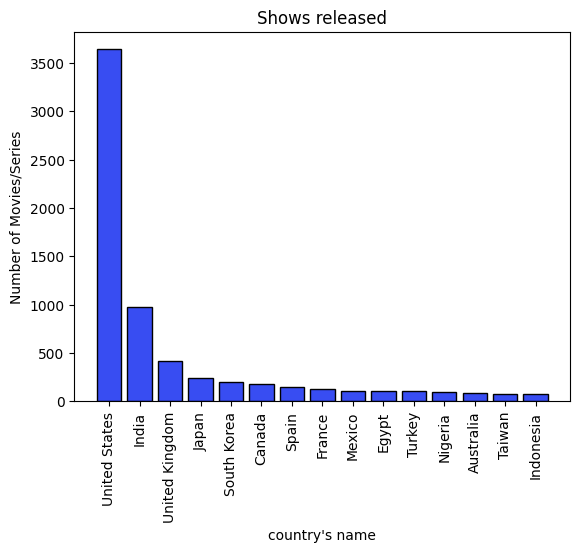

In [15]:
plt.bar(country['country'][0:15],country['count'][0:15],color='#384df2', edgecolor='black')
plt.xticks(country['country'][0:15],rotation = 90)
plt.ylabel('Number of Movies/Series')
plt.xlabel('country\'s name')
plt.title('Shows released')
plt.show()

#### Finding which type US releases most shows or movies?

In [16]:
Us_data = Netflix_data.loc[Netflix_data['country']=='United States']
Us_data_type = Us_data[['type','count']].groupby(['type']).sum().reset_index()

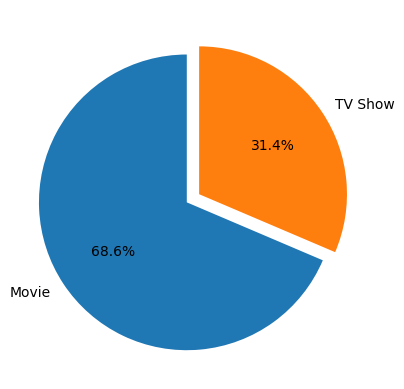

In [17]:
plt.pie(Us_data_type['count'],labels=Us_data_type['type'],explode=[0.1, 0], startangle=90, autopct="%.1f%%")
plt.show()

#### Finding which type India releases most shows or movies?

In [18]:
India_data = Netflix_data.loc[Netflix_data['country']=='India']
India_data_type = India_data[['type','count']].groupby(['type']).sum().reset_index()

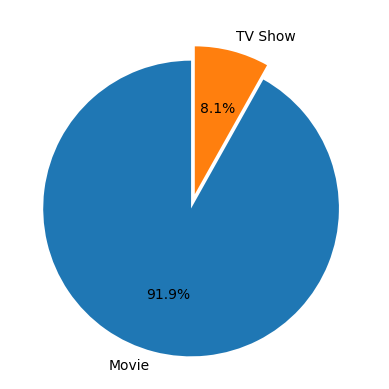

In [19]:
plt.pie(India_data_type['count'],labels=India_data_type['type'],explode=[0.1, 0], startangle=90, autopct="%.1f%%")
plt.show()

### Let's find out which country releases shows more than movies

In [20]:
countries = []
for country in Netflix_data['country']:
    country_data = Netflix_data.loc[Netflix_data['country']==country]
    country_data_type = country_data[['type','count']].groupby(['type']).sum().reset_index()
    if country_data_type.shape == (2,2):
        if (country_data_type.iloc[1][1] > country_data_type.iloc[0][1]) and (country_data_type.iloc[1][1]>25):
            countries.append(country)
        else:
            pass
    else:
        pass
    

In [21]:
countries = list(set(countries))


This is the list of countries which release most amount of TV Shows as compared to Movies

In [22]:
countries_data = Netflix_data.loc[Netflix_data['country']=='Australia']
countries_data_type = countries_data[['type','count']].groupby(['type']).sum().reset_index()

In [23]:
countries_data_type

,type,count
0,Movie,39
1,TV Show,47


In [24]:
no_of_movies = []
no_of_shows = []
for country in countries:
    countries_data = Netflix_data.loc[Netflix_data['country']==country]
    countries_data_type = countries_data[['type','count']].groupby(['type']).sum().reset_index()
    no_of_movies.append(countries_data_type.iloc[0][1])
    no_of_shows.append(countries_data_type.iloc[1][1])

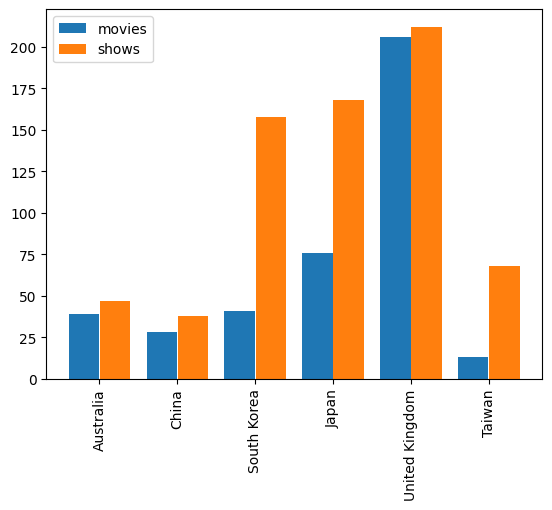

In [25]:
X_axis = np.arange(len(countries))
plt.bar(X_axis-0.2,no_of_movies,width=0.39,label='movies')
plt.bar(X_axis+0.2,no_of_shows,width=0.39,label='shows')
plt.legend()
plt.xticks(X_axis,countries,rotation=90)
plt.show()

Here we can see that these countries releases shows more than movies
